## Malaria Detection

In [5]:
import tensorflow

In [6]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
image_size = [224,224]

Train_data_path = '/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Train' 


Test_data_path = '/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Test'

In [10]:
Tr_LR = VGG19(input_shape = image_size + [3] , weights = 'imagenet' , include_top = False)

80142336/80134624 [==============================] - 1s 0us/step


In [11]:
for layers in Tr_LR.layers:
  layers.trainable = False

In [12]:
folders = glob('/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Train/*')


In [13]:
folders

['/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Train/Uninfected',
 '/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Train/Parasite']

In [14]:
x = Flatten()(Tr_LR.output)

In [15]:
pred = Dense(len(folders) , activation='softmax')(x)

In [16]:
model = Model(inputs = Tr_LR.input, outputs = pred)

In [17]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [18]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [20]:
train_data_Gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_data_Gen = ImageDataGenerator(rescale=1./255)

In [21]:
training_data_set = train_data_Gen.flow_from_directory('/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Train',
                                                       

                                                       target_size = (224,224),
                                                       batch_size = 32,
                                                       class_mode = 'categorical'
                                                    
                                                       
                                                       
                                                       
                                                       
                                                       
                                                       )

Found 416 images belonging to 2 classes.


In [22]:
training_data_set

In [23]:
test_data_set = test_data_Gen.flow_from_directory('/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [24]:
test_data_set

In [25]:
reg = model.fit_generator(
  training_data_set,
  validation_data=test_data_set,
  epochs=50,
  steps_per_epoch=len(training_data_set),
  validation_steps=len(test_data_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 284s 22s/step - loss: 1.7227 - accuracy: 0.4880 - val_loss: 0.9932 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 5s 414ms/step - loss: 0.9392 - accuracy: 0.6106 - val_loss: 0.4888 - val_accuracy: 0.7612
Epoch 3/50
13/13 [==============================] - 5s 420ms/step - loss: 0.4692 - accuracy: 0.7596 - val_loss: 0.4700 - val_accuracy: 0.7463
Epoch 4/50
13/13 [==============================] - 5s 405ms/step - loss: 0.3571 - accuracy: 0.8582 - val_loss: 0.4499 - val_accuracy: 0.7985
Epoch 5/50
13/13 [==============================] - 5s 402ms/step - loss: 0.3083 - accuracy: 0.8990 - val_loss: 0.3736 - val_accuracy: 0.8134
Epoch 6/50
13/13 [==============================] - 5s 403ms/step - loss: 0.2943 - accuracy: 0.9038 - val_loss: 0.3675 - val_accuracy: 0.8284
Epoch 7/50
13/13 [==============================] - 5s 400ms/step - loss

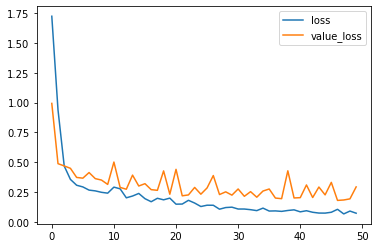

In [26]:
import matplotlib.pyplot as plt
plt.plot(reg.history['loss'],label='loss')
plt.plot(reg.history['val_loss'],label = 'value_loss')
plt.legend()
plt.show()

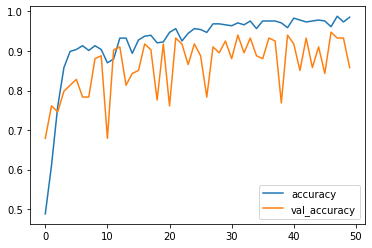

In [28]:
import matplotlib.pyplot as plt
plt.plot(reg.history['accuracy'],label='accuracy')
plt.plot(reg.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.show()

In [29]:
y_pred = model.predict(test_data_set)

In [30]:
y_pred

array([[8.24786067e-01, 1.75213963e-01],
       [6.93038762e-01, 3.06961268e-01],
       [7.12567031e-01, 2.87432939e-01],
       [9.98768270e-01, 1.23166444e-03],
       [2.84281224e-01, 7.15718746e-01],
       [1.23052187e-02, 9.87694740e-01],
       [1.01609930e-01, 8.98390114e-01],
       [7.78937936e-02, 9.22106266e-01],
       [7.97586024e-01, 2.02413961e-01],
       [1.52756954e-02, 9.84724283e-01],
       [3.56160760e-01, 6.43839180e-01],
       [9.16027486e-01, 8.39725509e-02],
       [9.99975801e-01, 2.42254118e-05],
       [2.01020297e-02, 9.79898036e-01],
       [1.26394602e-02, 9.87360537e-01],
       [9.99458849e-01, 5.41138696e-04],
       [8.01300943e-01, 1.98699057e-01],
       [4.75556284e-01, 5.24443746e-01],
       [9.98435915e-01, 1.56411936e-03],
       [9.83850658e-01, 1.61492638e-02],
       [9.54059362e-01, 4.59405892e-02],
       [1.60988837e-01, 8.39011133e-01],
       [8.68606381e-03, 9.91313994e-01],
       [9.99415159e-01, 5.84913534e-04],
       [9.984326

In [31]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)

In [32]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0])

In [33]:
from tensorflow.keras.preprocessing import image

In [34]:
img = image.load_img('/content/drive/My Drive/Deep learning CNN  Data Sets/Malaria-Detection-master/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [35]:
a = image.img_to_array(img)
a

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [36]:
a.shape

(224, 224, 3)

In [37]:
a=np.expand_dims(a,axis=0)
img_data=preprocess_input(a)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [39]:
b = np.argmax(model.predict(img_data),axis=1)

In [41]:
if b==1:
  print('uninfected')

else:
  print('infected_person')

infected_person
